In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from src.utils import load, add_variables, clean_data
from src.ploting import BoxPlot, LinearPlot, DistPlot, BarPlot, HistPlot, ACFPlot

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 50)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



## Dodawanie zmiennych

In [7]:

CURR = "EURUSD"
INTER = "4h"
WEEKDAY_CODES = ["weekday_0", "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6"]
HOUR_CODES = [f"hour_{i}" for i in range(24)]
OHLCV = ['Open', 'High', 'Low', 'Close', 'Volume']
INDICATORS = ['roi_1', 'roi_3', 'roi_5', 'roi_10', 'roi_20', 'candle_body_size', 'vol_change_1', 'vol_change_2',
              'vol_change_3', 'sma_50', 'sma_200', 'candle_size', 'impulse']
ROI = ['roi_1', 'roi_3', 'roi_5', 'roi_10', 'roi_20']
LABELS = ['target_value', 'target_direction']

In [31]:
# load data
data = load(currency=CURR, interval=INTER)
data = add_variables(data)
data.head()

Open    Low   High  Close   Volume     roi_1     roi_3  \
Datetime                                                                       
2011-08-17 16:00:00  1.439  1.438  1.440  1.440  10498.0       NaN       NaN   
2011-08-17 20:00:00  1.440  1.438  1.442  1.440  48178.0  0.000000       NaN   
2011-08-18 00:00:00  1.440  1.435  1.445  1.437  63321.0 -0.002083       NaN   
2011-08-18 04:00:00  1.437  1.427  1.438  1.432  78080.0 -0.003479 -0.005556   
2011-08-18 08:00:00  1.432  1.430  1.434  1.434  38928.0  0.001397 -0.004167   

                     roi_5  roi_10  roi_20  candle_body_size  vol_change_1  \
Datetime                                                                     
2011-08-17 16:00:00    NaN     NaN     NaN          0.500000           NaN   
2011-08-17 20:00:00    NaN     NaN     NaN          0.000000      3.589255   
2011-08-18 00:00:00    NaN     NaN     NaN         -0.299999      0.314314   
2011-08-18 04:00:00    NaN     NaN     NaN         -0.454548      0.233082   
2011-08-18 08:00:00    NaN     NaN     NaN          0.499985     -0.501434   

                     vol_change_2  vol_change_3  sma_50  sma_200  \
Datetime                                                           
2011-08-17 16:00:00           NaN           NaN     NaN      NaN   
2011-08-17 20:00:00           NaN           NaN     NaN      NaN   
2011-08-18 00:00:00      5.031720           NaN     NaN      NaN   
2011-08-18 04:00:00      0.620657      6.437607     NaN      NaN   
2011-08-18 08:00:00     -0.385228     -0.191996     NaN      NaN   

                     target_value  candle_size  impulse        hour_0  \
Datetime                                                                
2011-08-17 16:00:00         1.440        0.002        0  5.440862e-31   
2011-08-17 20:00:00         1.437        0.004        0  2.715920e-08   
2011-08-18 00:00:00         1.432        0.010        0  3.366044e-01   
2011-08-18 04:00:00         1.434        0.011        0  5.547257e-05   
2011-08-18 08:00:00         1.430        0.004        0  6.743271e-24   

                           hour_1        hour_2        hour_3        hour_4  \
Datetime                                                                      
2011-08-17 16:00:00  1.123424e-38  0.000000e+00  0.000000e+00  0.000000e+00   
2011-08-17 20:00:00  2.367051e-12  2.791961e-17  4.456790e-23  9.628220e-30   
2011-08-18 00:00:00  1.536284e-02  9.489307e-05  7.932469e-08  8.974150e-12   
2011-08-18 04:00:00  1.068673e-02  2.786266e-01  9.831307e-01  4.694734e-01   
2011-08-18 08:00:00  5.483427e-18  6.034545e-13  8.987688e-09  1.811601e-05   

                           hour_5        hour_6        hour_7        hour_8  \
Datetime                                                                      
2011-08-17 16:00:00  0.000000e+00  3.460927e-41  3.080816e-33  3.711540e-26   
2011-08-17 20:00:00  2.815016e-37  1.401298e-45  0.000000e+00  0.000000e+00   
2011-08-18 00:00:00  1.374008e-16  2.847058e-22  7.983885e-29  3.030005e-36   
2011-08-18 04:00:00  3.034043e-02  2.653649e-04  3.141061e-07  5.031764e-11   
2011-08-18 08:00:00  4.941833e-03  1.824419e-01  9.115329e-01  6.163551e-01   

                           hour_9       hour_10       hour_11       hour_12  \
Datetime                                                                      
2011-08-17 16:00:00  6.051366e-20  1.335254e-14  3.987358e-10  1.611453e-06   
2011-08-17 20:00:00  0.000000e+00  1.170084e-42  1.474151e-34  2.514718e-27   
2011-08-18 00:00:00  1.541428e-44  0.000000e+00  0.000000e+00  0.000000e+00   
2011-08-18 04:00:00  1.090875e-15  3.200672e-21  1.270920e-27  6.829771e-35   
2011-08-18 08:00:00  5.640281e-02  6.985242e-04  1.170775e-06  2.655682e-10   

                          hour_13       hour_14       hour_15       hour_16  \
Datetime                                                                      
2011-08-17 16:00:00  8.813758e-04  6.524025e-02  6.535535e-01  8.860490e-01   
2011-08-17 20:00:00  5.805

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18050 entries, 2011-08-17 16:00:00 to 2022-11-01 16:00:00
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              18050 non-null  float32
 1   Low               18050 non-null  float32
 2   High              18050 non-null  float32
 3   Close             18050 non-null  float32
 4   Volume            18050 non-null  float32
 5   roi_1             18049 non-null  float32
 6   roi_3             18047 non-null  float32
 7   roi_5             18045 non-null  float32
 8   roi_10            18040 non-null  float32
 9   roi_20            18030 non-null  float32
 10  candle_body_size  17727 non-null  float32
 11  vol_change_1      18019 non-null  float32
 12  vol_change_2      18019 non-null  float32
 13  vol_change_3      18019 non-null  float32
 14  sma_50            18001 non-null  float64
 15  sma_200           17851 non-null  float64
 16  targe

In [14]:
# clean data
data = clean_data(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17503 entries, 2011-10-02 16:00:00 to 2022-10-25 16:00:00
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              17503 non-null  float32
 1   Low               17503 non-null  float32
 2   High              17503 non-null  float32
 3   Close             17503 non-null  float32
 4   Volume            17503 non-null  float32
 5   roi_1             17503 non-null  float32
 6   roi_3             17503 non-null  float32
 7   roi_5             17503 non-null  float32
 8   roi_10            17503 non-null  float32
 9   roi_20            17503 non-null  float32
 10  candle_body_size  17503 non-null  float32
 11  vol_change_1      17503 non-null  float32
 12  vol_change_2      17503 non-null  float32
 13  vol_change_3      17503 non-null  float32
 14  sma_50            17503 non-null  float64
 15  sma_200           17503 non-null  float64
 16  targe

## Podstawowe statystyki opisowe

OHLC statystyki

In [26]:
data[OHLCV].describe().apply(round, ndigits=4).T

Indicators statystyki

In [30]:
data[INDICATORS].describe().apply(round, ndigits=6).T.drop(columns=['count'])


mean          std       min       25%       50%  \
roi_1             -0.000014     0.002108 -0.031774 -0.000887  0.000000   
roi_3             -0.000047     0.003548 -0.035180 -0.001779  0.000000   
roi_5             -0.000071     0.004525 -0.030919 -0.002608  0.000000   
roi_10            -0.000150     0.006337 -0.041308 -0.003726  0.000000   
roi_20            -0.000321     0.008982 -0.046470 -0.005623  0.000000   
candle_body_size   0.000101     0.564508 -1.000000 -0.499970  0.000000   
vol_change_1       5.655217   159.541901 -1.000000 -0.406587  0.157020   
vol_change_2      43.234131   747.867920 -1.000000 -0.527768  0.210187   
vol_change_3      81.561562  1286.709961 -1.000000 -0.648627  0.041569   
sma_50             1.185428     0.097861  0.972012  1.113210  1.163460   
sma_200            1.187104     0.097169  0.985836  1.111473  1.164523   
candle_size        0.003327     0.002475  0.000500  0.002000  0.003000   
impulse            0.052391     0.222821  0.000000  0.000000  0.000000   

                       75%           max  
roi_1             0.000884      0.025568  
roi_3             0.001764      0.035038  
roi_5             0.002482      0.035038  
roi_10            0.003537      0.033081  
roi_20            0.005111      0.049774  
candle_body_size  0.499970      1.000000  
vol_change_1      0.704119  16352.000000  
vol_change_2      1.547309  31672.000000  
vol_change_3      2.103944  63720.000000  
sma_50            1.264865      1.394040  
sma_200           1.272934      1.396085  
candle_size       0.004000      0.043000  
impulse           0.000000      1.000000

## Korelacje pomiedzy zmiennymi

<Axes: >

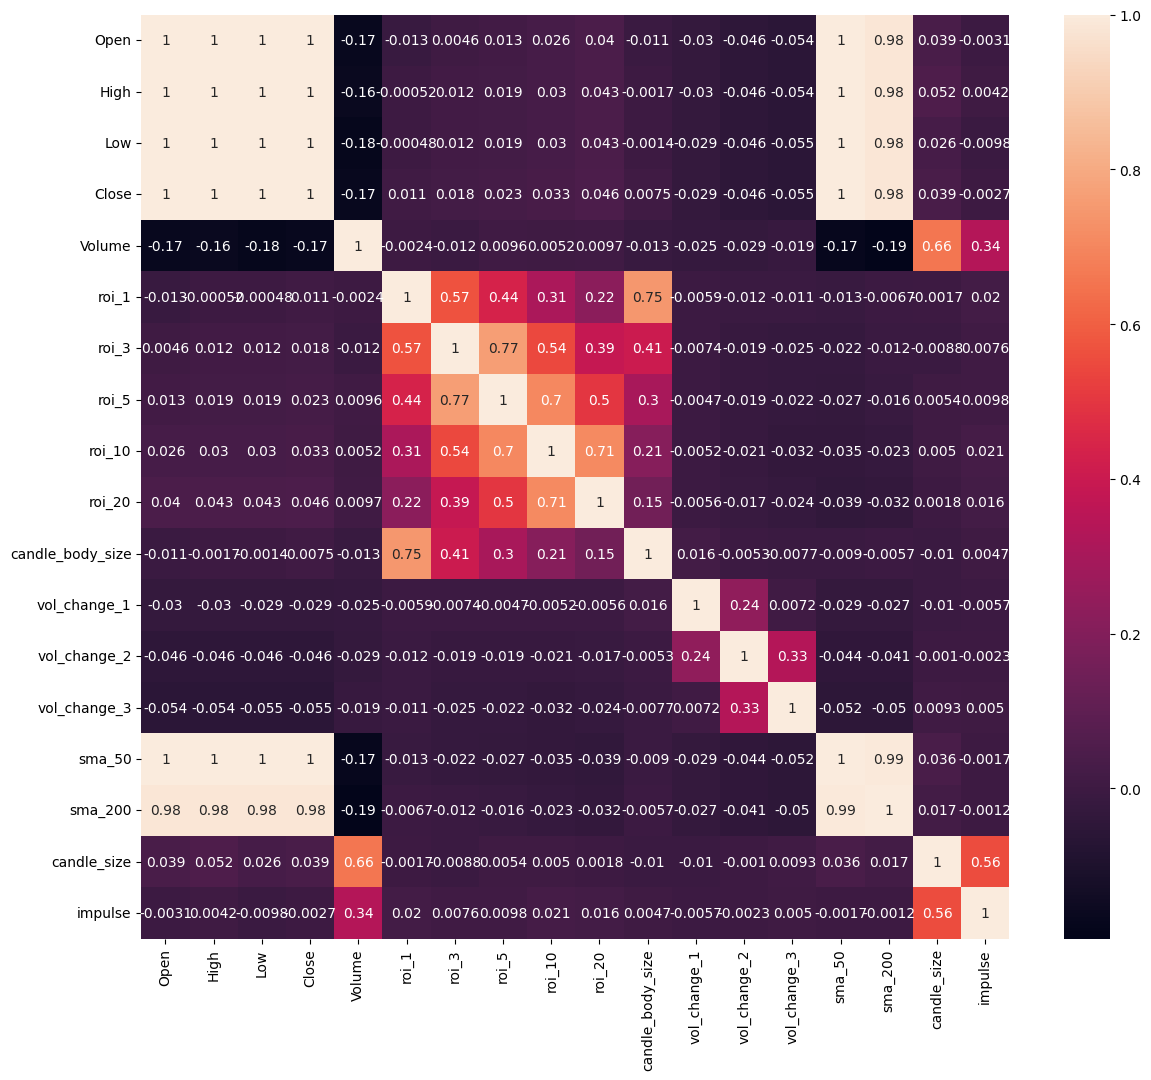

In [35]:
plt.figure(figsize=(14, 12))
corr = data[OHLCV + INDICATORS].corr()
sns.heatmap(corr, annot=True)

Korelacja OHLCV

<Axes: >

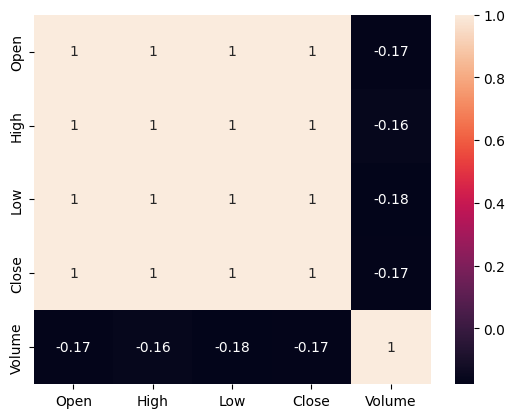

In [37]:
corr = data[OHLCV].corr()
sns.heatmap(corr, annot=True)

Korelacja ROI

<Axes: >

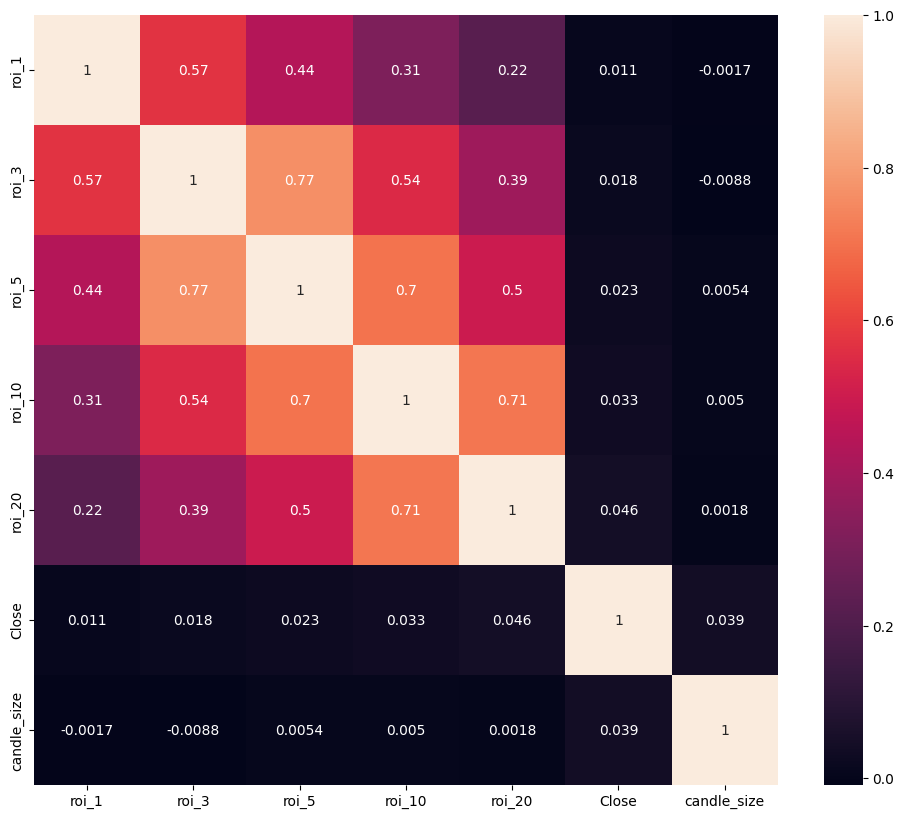

In [38]:
# wykres korelacji
plt.figure(figsize=(12, 10))
corr = data[ROI + ['Close', 'candle_size']].corr()
sns.heatmap(corr, annot=True)
# heatmap

In [41]:
 data[['Close', 'Volume'] + indic_without_roi].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18050 entries, 2011-08-17 16:00:00 to 2022-11-01 16:00:00
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             18050 non-null  float32
 1   Volume            18050 non-null  float32
 2   candle_body_size  17727 non-null  float32
 3   candle_size       18050 non-null  float32
 4   impulse           18050 non-null  int64  
 5   sma_200           17851 non-null  float64
 6   sma_50            18001 non-null  float64
 7   vol_change_1      18019 non-null  float32
 8   vol_change_2      18019 non-null  float32
 9   vol_change_3      18019 non-null  float32
dtypes: float32(7), float64(2), int64(1)
memory usage: 1.0 MB


<Axes: >

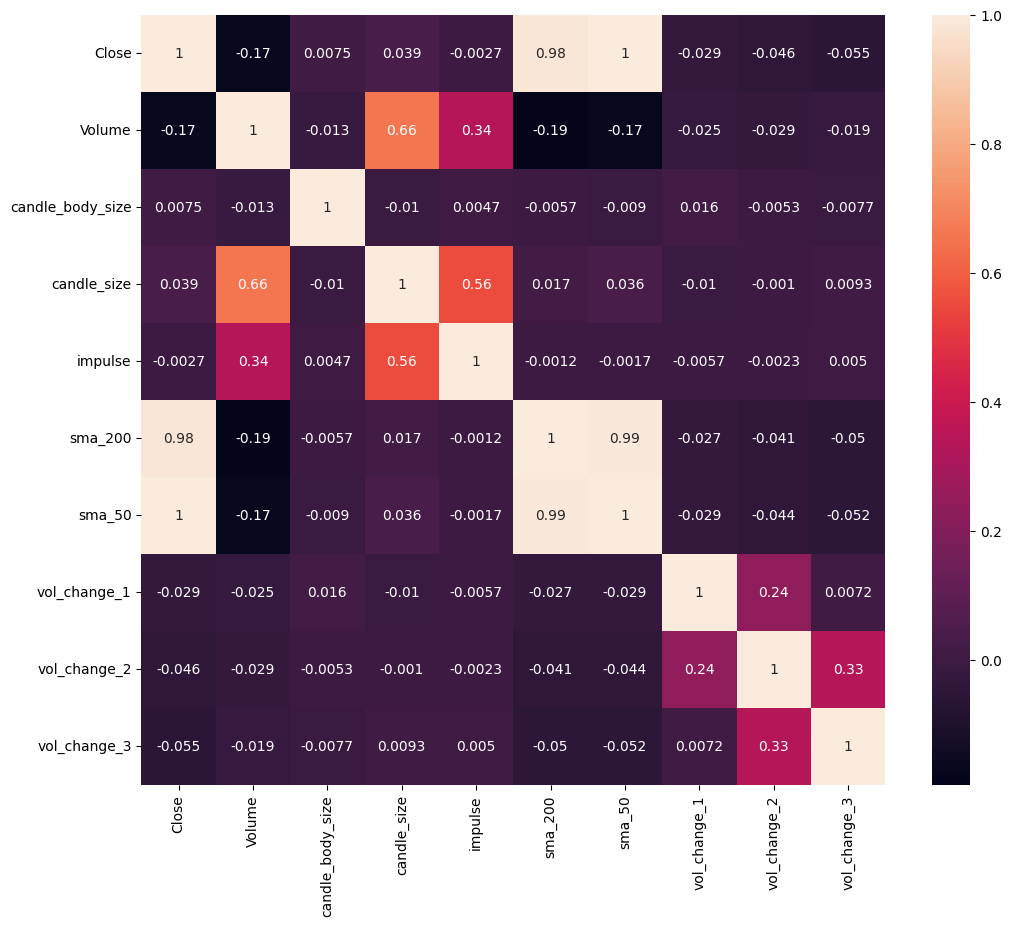

In [40]:
plt.figure(figsize=(12, 10))
indic_without_roi = list(set(INDICATORS).difference(ROI))
indic_without_roi.sort()
corr = data[['Close', 'Volume'] + indic_without_roi].corr()
sns.heatmap(corr, annot=True)


In [46]:
data.corr().loc[OHLCV + INDICATORS, ['target_value']].apply(round, ndigits=3).to_clipboard()

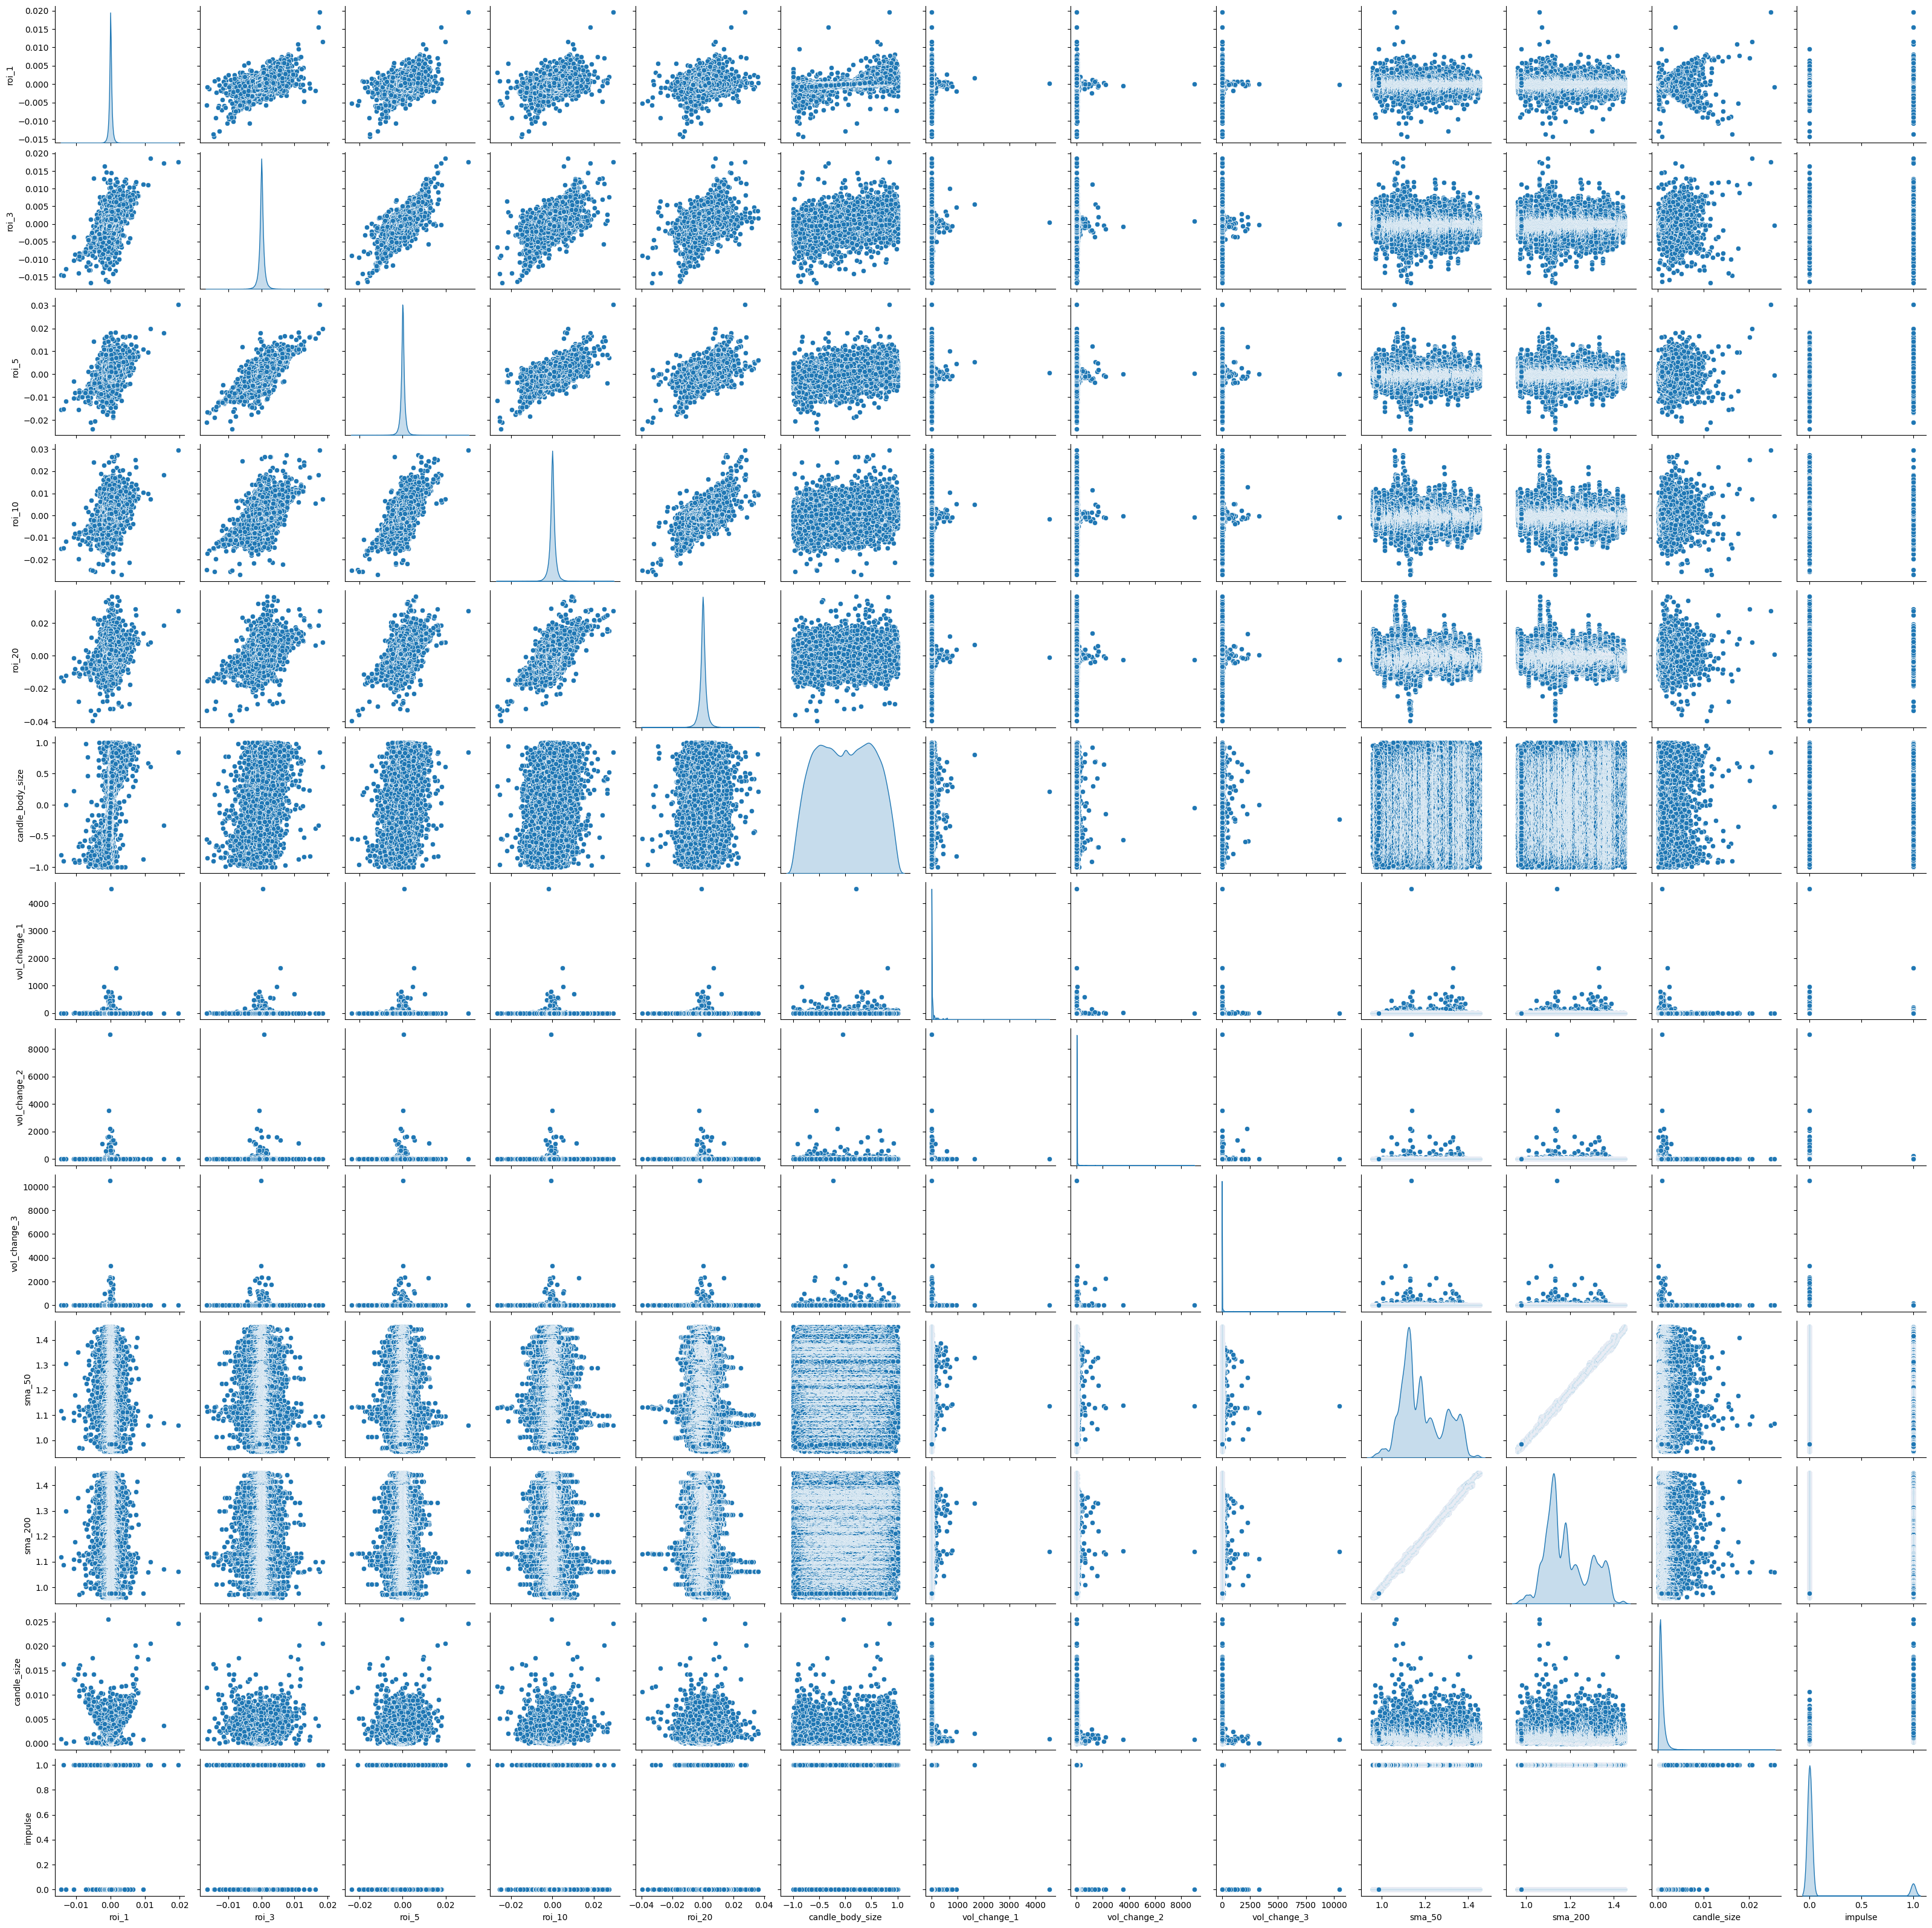

In [51]:
sns.pairplot(data=data[INDICATORS], diag_kind='kde')

## Boxploty

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'OHLC wykres pudełkowy'}>

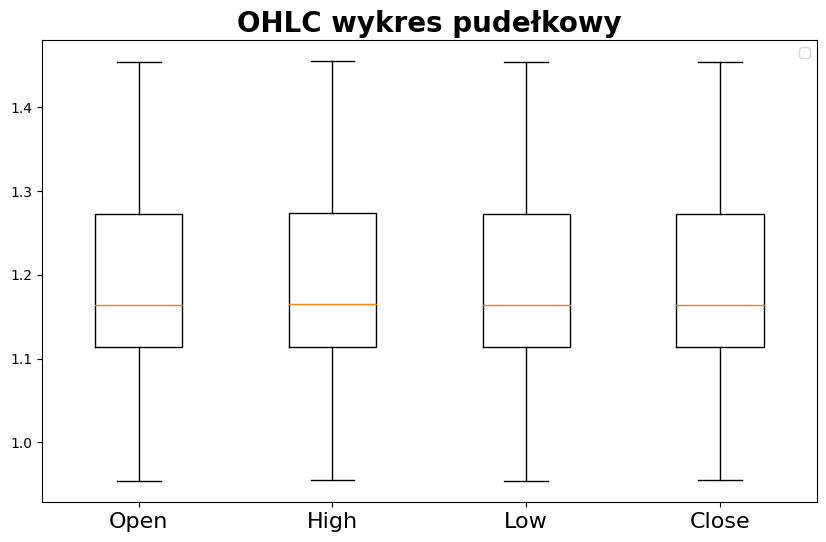

In [83]:
ohlc = OHLCV.copy()
ohlc.remove("Volume")
BoxPlot(w=10, h=6).plot(title="OHLC wykres pudełkowy", y=data[ohlc], labels=ohlc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


saving: Volume wykres pudełkowy


<Axes: title={'center': 'Volume wykres pudełkowy'}>

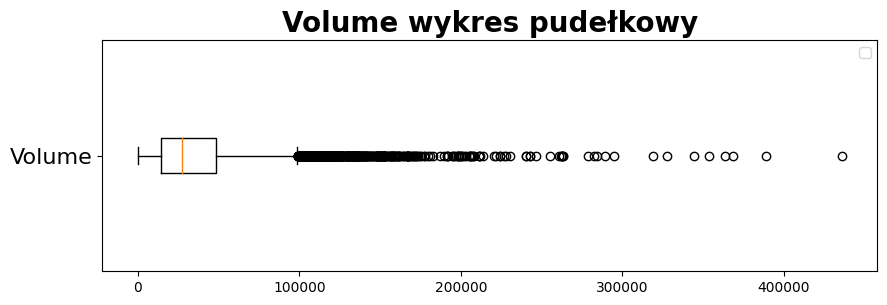

In [47]:
BoxPlot(w=10, h=3).plot(y=data["Volume"], title="Volume wykres pudełkowy", labels=["Volume"], vert=0)

liczba outlierów

In [48]:
q_1, q_3 = data['Volume'].quantile(0.25), data['Volume'].quantile(0.75)
outliers = data['Volume'] > (q_3 + 1.5*(q_3 - q_1))
print(f"number of outliers: {sum(outliers)} which is {sum(outliers)/outliers.shape[0]}") 

number of outliers: 687 which is 0.03806094182825485


In [87]:
(q_3 + 1.5*(q_3 - q_1))

6317.0

In [61]:
data.dropna(inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


saving: ROI wykres pudełkowy


<Axes: title={'center': 'ROI wykres pudełkowy'}>

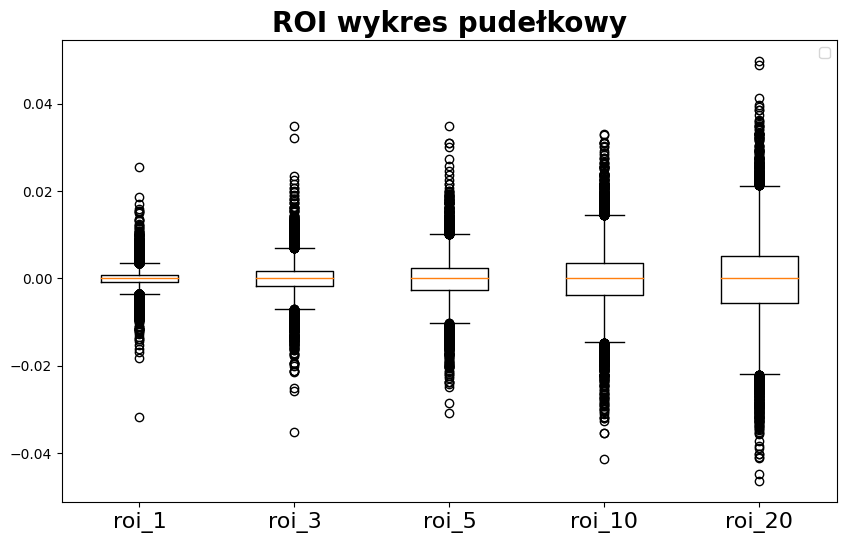

In [52]:
BoxPlot(legend=True, w=10, h=6).plot(title="ROI wykres pudełkowy", y=data[ROI].dropna(), labels=ROI)

Wartości są tak małe, że boxplot ma problem z dobraniem skali i nie jest w stanie przedstawić ROI_k na wykresie pudełkowym.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


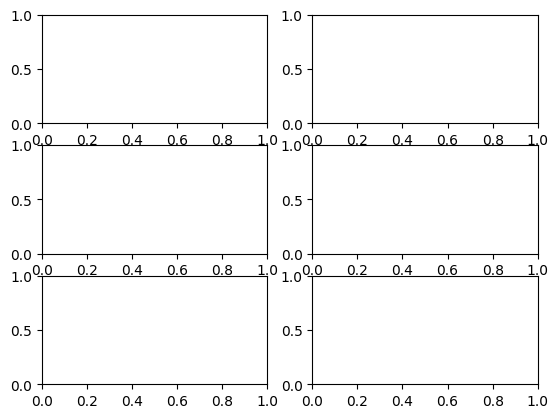

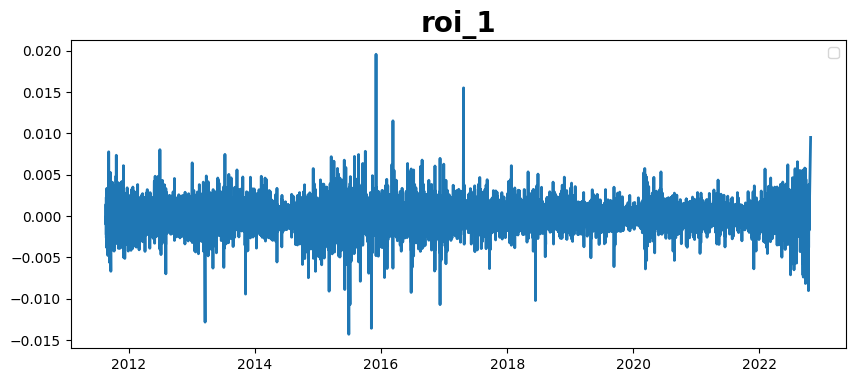

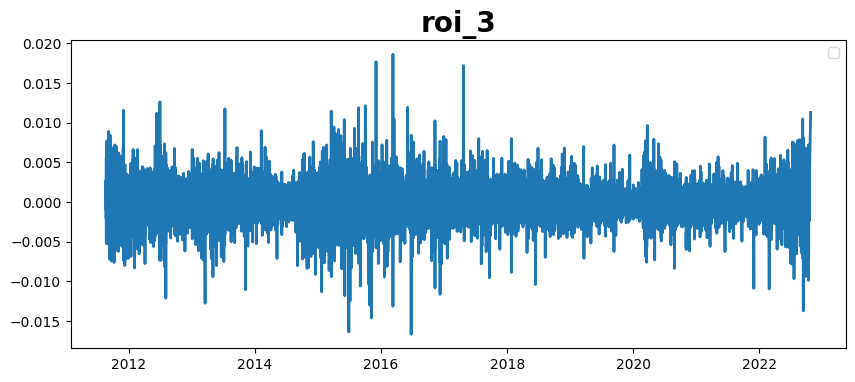

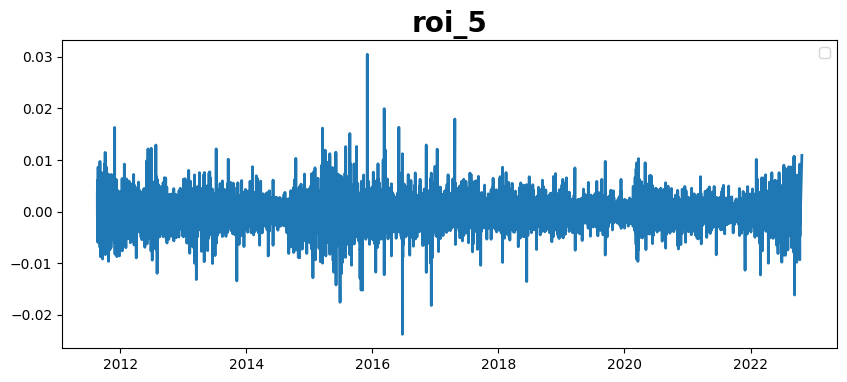

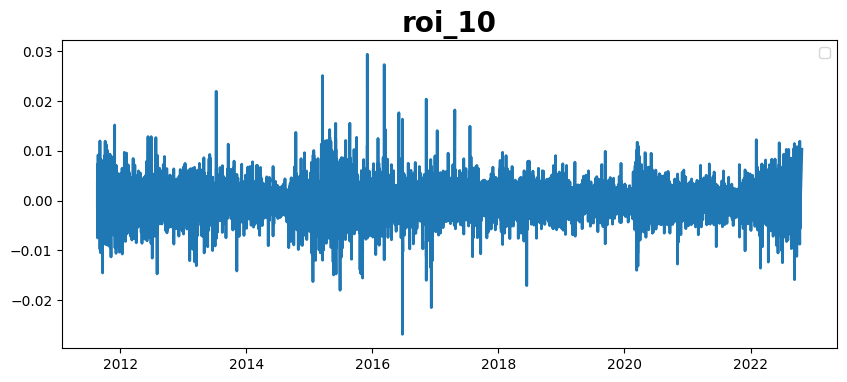

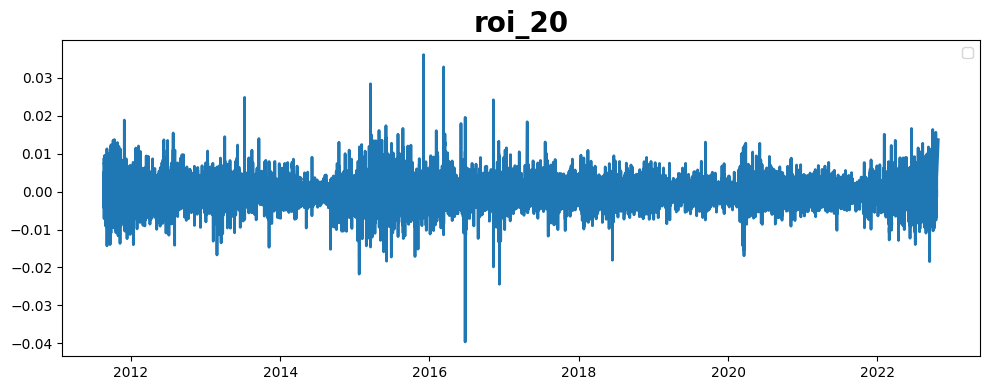

In [89]:
fig, axs = plt.subplots(3, 2)
for i, r in enumerate(ROI):
    row, col = i // 2, i % 2
    lp = LinearPlot(w=10, h=4).plot(data[r].index, data[r], title=r)

plt.tight_layout()

## Wykresy rozkładów

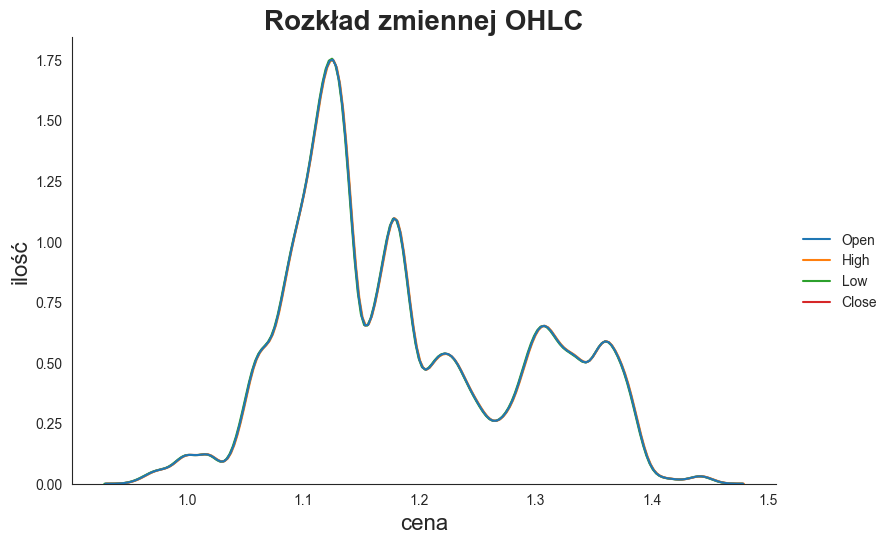

In [94]:
dp = DistPlot(h=5, w=8)
dp.plot(data[OHLCV[:-1]], title=f"Rozkład zmiennej OHLC",  xlabel="cena", ylabel="ilość")

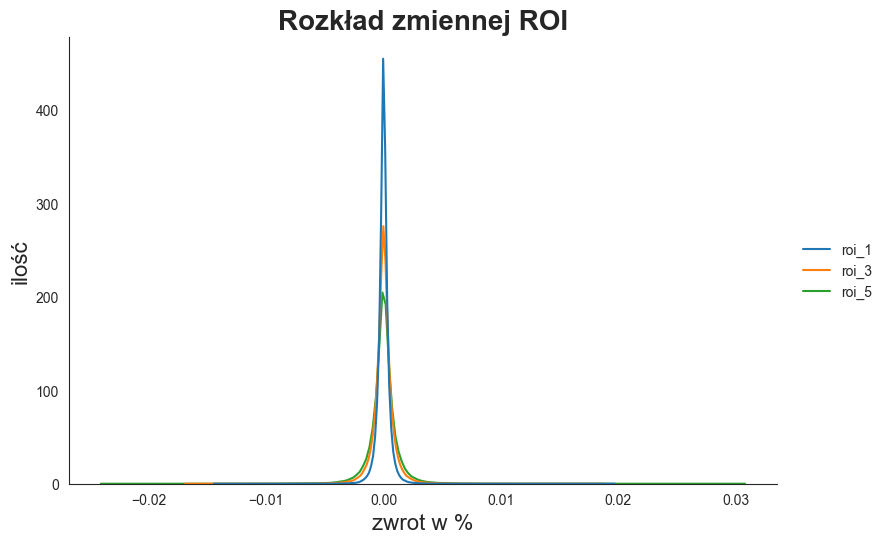

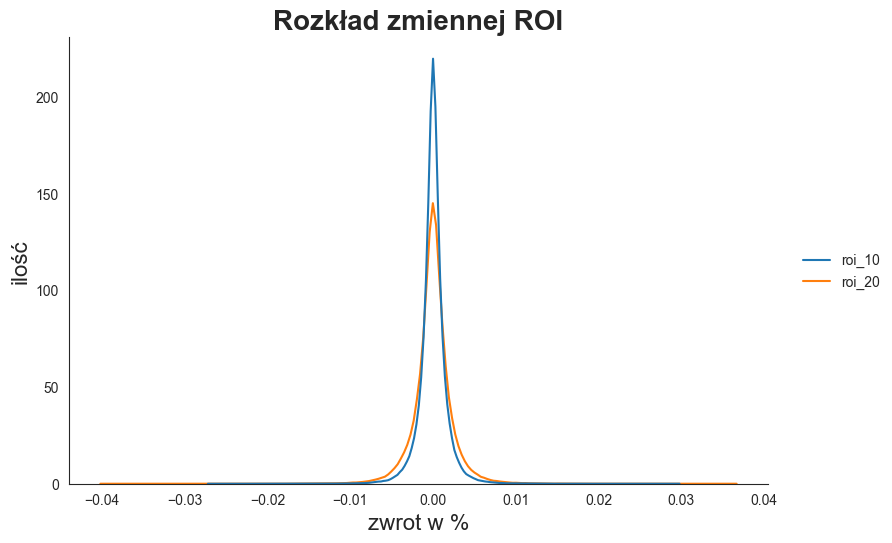

In [95]:
dp.plot(data[ROI[:3]], title=f"Rozkład zmiennej ROI", xlabel="zwrot w %", ylabel="ilość")
dp.plot(data[ROI[3:]], title=f"Rozkład zmiennej ROI", xlabel="zwrot w %", ylabel="ilość")

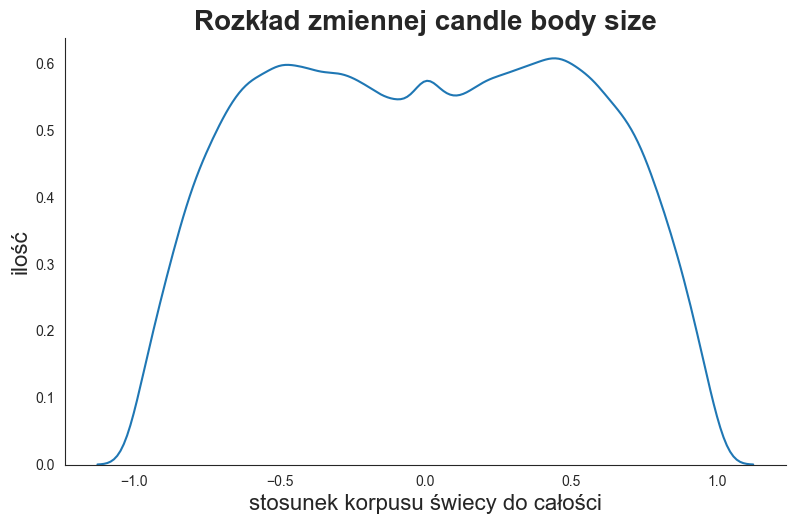

In [96]:
dp.plot(data['candle_body_size'], title=f"Rozkład zmiennej candle body size", xlabel="stosunek korpusu świecy do całości", ylabel="ilość")

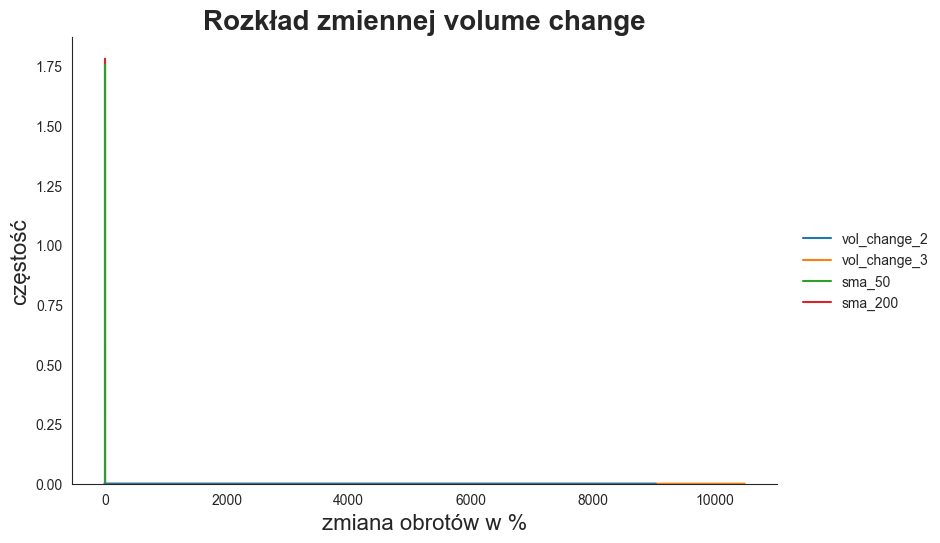

In [97]:
dp.plot(data[INDICATORS[7:11]], title=f"Rozkład zmiennej volume change", xlabel="zmiana obrotów w %", ylabel="częstość")

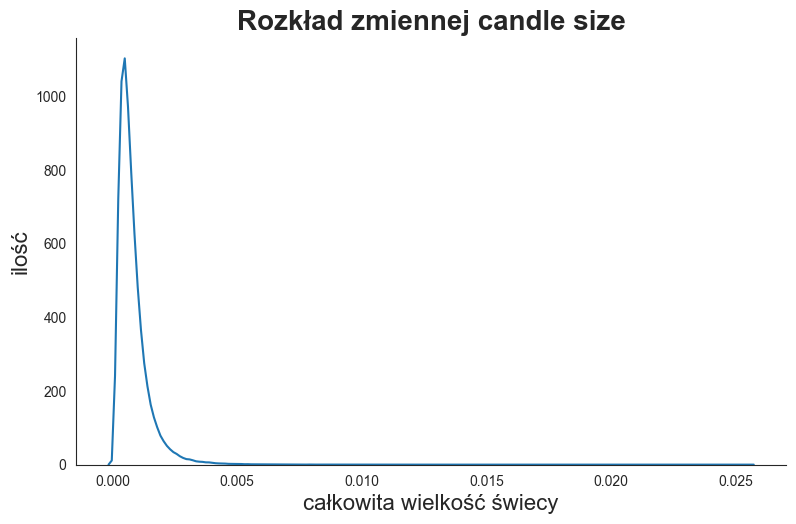

In [98]:
dp.plot(data['candle_size'], title=f"Rozkład zmiennej candle size", xlabel="całkowita wielkość świecy", ylabel="ilość")

## Badanie normalności zmiennej objaśnianej

Korelacja zmiennej endogenicznej z pozostałymi zmiennymi

In [99]:
Y = data['target_value']

In [100]:
Y.describe()

count    277135.000000
mean          1.187428
std           0.100095
min           0.954520
25%           1.113840
50%           1.164200
75%           1.272945
max           1.454150
Name: target_value, dtype: float64

<Axes: title={'center': 'Wykres pudełkowy zmiennej objaśnianej'}>

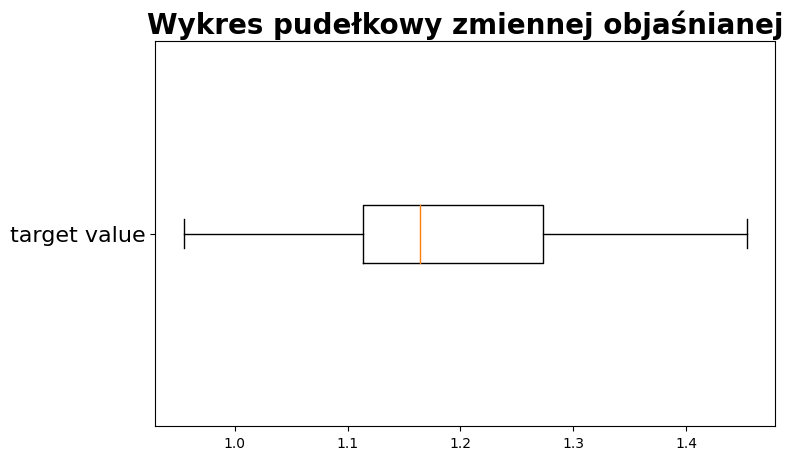

In [105]:
bp = BoxPlot(legend=False, w=8, h=5)
bp.plot(Y.values, title="Wykres pudełkowy zmiennej objaśnianej", vert=0, labels=['target value'])

<Axes: title={'center': 'Korelacji target_value z zmiennymi egzogenicznymi'}>

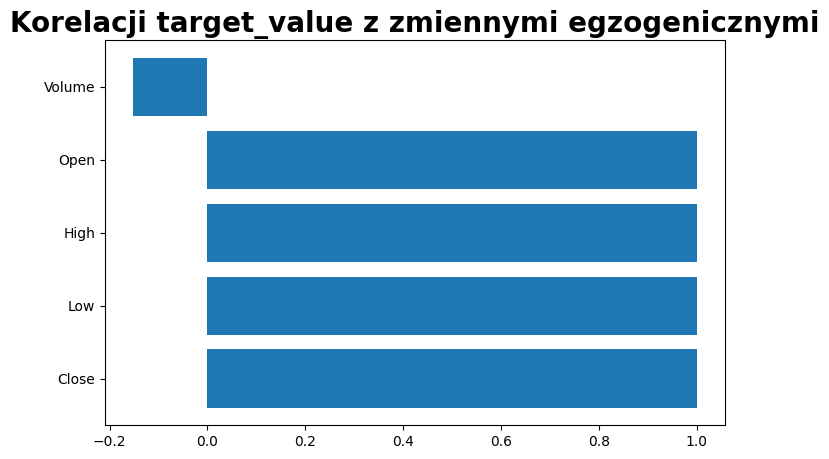

In [109]:
Y_corr_ohlc = data[OHLCV + ['target_value']].corr()['target_value'].sort_values(ascending=False).drop('target_value')
brp = BarPlot(legend=False, w=8, h=5)
brp.plot(Y_corr_ohlc.index, Y_corr_ohlc, title="Korelacji target_value z zmiennymi egzogenicznymi",vert=True)

In [110]:
Y_corr_ind = data[INDICATORS + ['target_value']].corr()['target_value'].sort_values(ascending=False).drop('target_value')
brp.plot(Y_corr_ind.index, Y_corr_ind, title="Korelacji target_value z zmiennymi egzogenicznymi", vert=True)

<Axes: title={'center': 'Korelacji target_value z zmiennymi egzogenicznymi'}>

## Badanie stacjonarności, trendu, sezonowości, autokorelacji zmiennej endogenicznej

In [63]:
Y = data['target_value']

Badanie normalności testem Kołmogrova-Smirnowa

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


saving: Rozkład zmiennej target_value


<Axes: title={'center': 'Rozkład zmiennej target_value'}, xlabel='target_value', ylabel='ilość'>

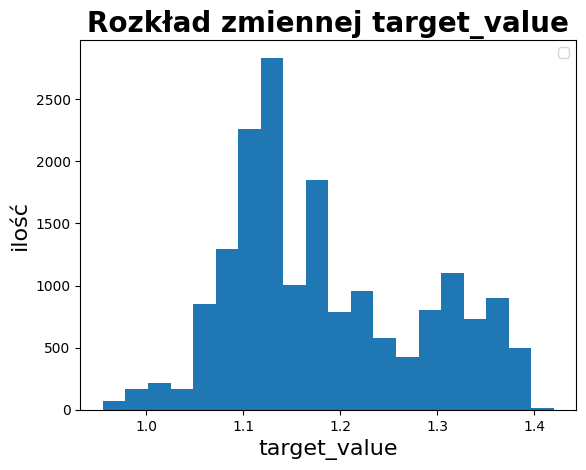

In [64]:
HistPlot().plot(Y, title=f"Rozkład zmiennej target_value", xlabel="target_value", ylabel="ilość")

In [65]:
kstest(Y, 'norm')

KstestResult(statistic=0.8326385848415201, pvalue=0.0, statistic_location=0.9683, statistic_sign=-1)

saving: Zmiana target_value w czasie


<Axes: title={'center': 'Zmiana target_value w czasie'}, xlabel='czas', ylabel='target_value'>

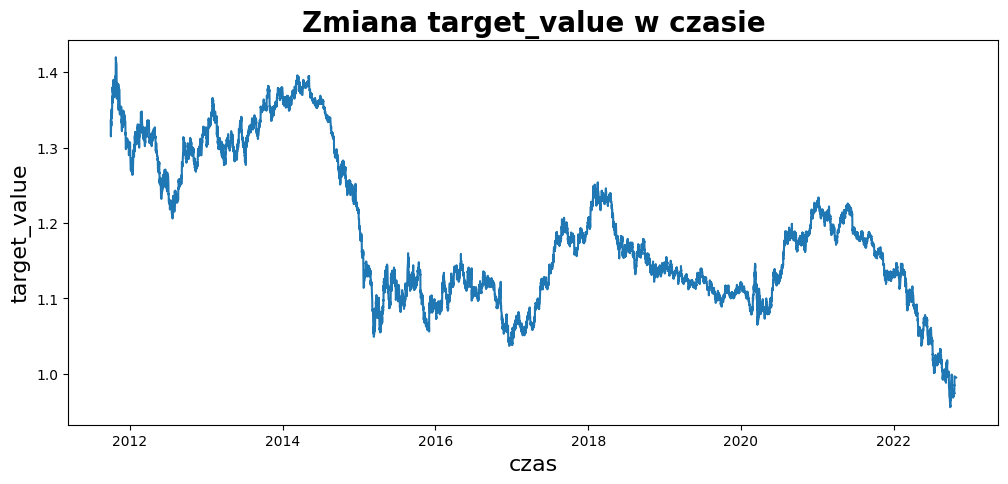

In [66]:
LinearPlot(h=5, w=12, legend=False).plot(data.index, Y,title=f"Zmiana target_value w czasie", xlabel="czas", ylabel="target_value")

Badanie stacjonarności rozszerzonym testem Dickeya-Fullera
- H0: non-stationary
- H1: stationary

In [67]:
adfuller(Y)

(-1.3956845336333137,
 0.5843432497474743,
 1,
 17501,
 {'1%': -3.4307237077541015,
  '5%': -2.8617051643940212,
  '10%': -2.5668579127195654},
 -160149.36177957844)

Badanie stacjonarności testem KPSS, 
- H0: trend is stationary
- H1: is non-stationary

In [68]:
kpss(Y)

/Users/sebastiansukiennik/.pyenv/versions/3.9.6/envs/BACH/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(10.609647314196545,
 0.01,
 77,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

ACF and PACF

<Axes: title={'center': 'PACF dla target_value'}>

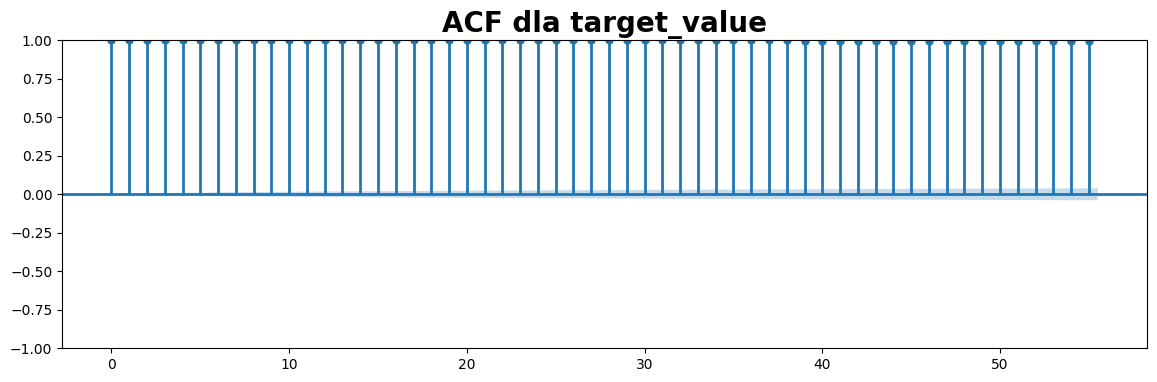

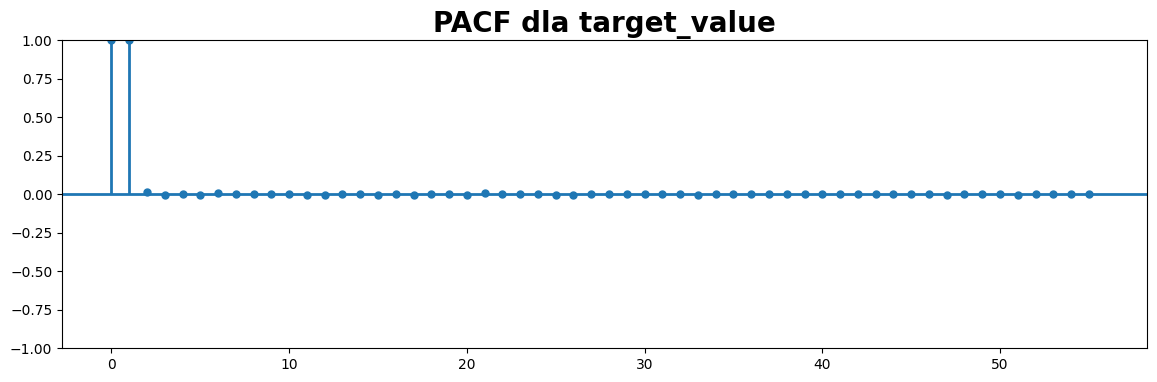

In [142]:
ACFPlot(legend=False, w=14).plot(data['target_value'], title="ACF dla target_value")
ACFPlot(legend=False, w=14).plot(data['target_value'], title="PACF dla target_value", partial=True)

## Wybór statystyki błędu